In [1]:
import numpy
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
numpy.random.seed(10)

In [2]:
all_df = pd.read_csv("data.csv")

In [3]:
all_df['class']= all_df['class'].map({'RB':0, 'NRB': 1}).astype(int)

In [4]:
all_df.shape

(1055, 42)

In [5]:
X=all_df.drop(['class'], axis=1).values.astype('float64')

In [6]:
Y = all_df['class'].values.astype('int64')

In [7]:
X.shape

(1055, 41)

In [8]:
 X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

844

In [9]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

Using TensorFlow backend.


In [10]:
model = Sequential()

In [11]:
model.add(Dense(units=41*9,   input_dim=41,
                kernel_initializer='uniform', 
                activation='relu'))

In [12]:
model.add(Dense(units=41*8,  
                kernel_initializer='uniform', 
                activation='relu'))

In [13]:
model.add(Dense(units=41*7, 
                kernel_initializer='uniform', 
                activation='relu'))

In [14]:
model.add(Dense(units=41*6,   
                kernel_initializer='uniform', 
                activation='relu'))

In [15]:
model.add(Dense(units=41*5,  
                kernel_initializer='uniform', 
                activation='relu'))

In [16]:
model.add(Dense(units=41*4,   
                kernel_initializer='uniform', 
                activation='relu'))

In [17]:
model.add(Dense(units=41*3, 
                kernel_initializer='uniform', 
                activation='relu'))

In [18]:
model.add(Dense(units=41*2, 
                kernel_initializer='uniform', 
                activation='relu'))

In [19]:
model.add(Dense(units=41, 
                kernel_initializer='uniform', 
                activation='relu'))

In [20]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 369)               15498     
_________________________________________________________________
dense_2 (Dense)              (None, 328)               121360    
_________________________________________________________________
dense_3 (Dense)              (None, 287)               94423     
_________________________________________________________________
dense_4 (Dense)              (None, 246)               70848     
_________________________________________________________________
dense_5 (Dense)              (None, 205)               50635     
_________________________________________________________________
dense_6 (Dense)              (None, 164)               33784     
_________________________________________________________________
dense_7 (Dense)              (None, 123)               20295     
__________

In [22]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [23]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=60,verbose=1,callbacks=[early_stopping])

Train on 759 samples, validate on 85 samples
Epoch 1/30
759/759 [==============================] - 4s 6ms/step - loss: 0.6913 - acc: 0.6680 - val_loss: 0.6865 - val_acc: 0.7059
Epoch 2/30
759/759 [==============================] - 1s 812us/step - loss: 0.6272 - acc: 0.6680 - val_loss: 0.4276 - val_acc: 0.7059
Epoch 3/30
759/759 [==============================] - 1s 718us/step - loss: 0.4642 - acc: 0.6680 - val_loss: 0.3373 - val_acc: 0.7059
Epoch 4/30
759/759 [==============================] - 1s 820us/step - loss: 0.4285 - acc: 0.6680 - val_loss: 0.3362 - val_acc: 0.7059
Epoch 5/30
759/759 [==============================] - 1s 1ms/step - loss: 0.4069 - acc: 0.6680 - val_loss: 0.3770 - val_acc: 0.7059
Epoch 6/30
759/759 [==============================] - 1s 915us/step - loss: 0.4012 - acc: 0.8182 - val_loss: 0.3234 - val_acc: 0.8824
Epoch 7/30
759/759 [==============================] - 1s 891us/step - loss: 0.3435 - acc: 0.8906 - val_loss: 0.2727 - val_acc: 0.9059
Epoch 8/30
759/759 [=

In [24]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

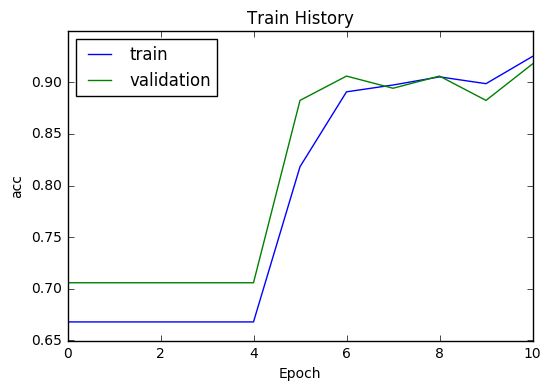

In [25]:
show_train_history(train_history,'acc','val_acc')

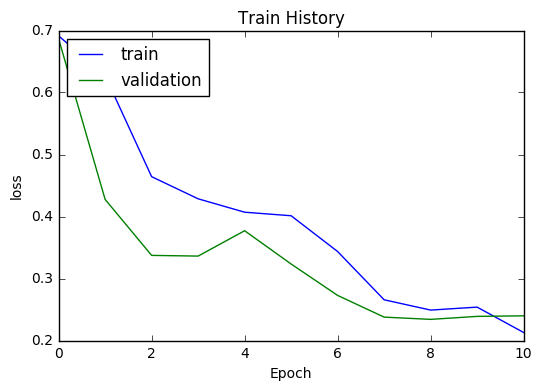

In [26]:
show_train_history(train_history,'loss','val_loss')

In [27]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

211/211 [==============================] - 0s 552us/step


In [28]:
scores[1]

0.8483412308150559